<h3>Loading and Displaying the Data </h3>

In [62]:
import pandas as pd

# Load the CSV file into a DataFrame
data_path = 'C:\\Users\\serge\\FinalYear\\DAV\\DAV_CA1_SERG\\world-data-2023.csv'
data = pd.read_csv(data_path)

# Selected specific columns for the analysis
selected_columns = [
    'Country',
    'Population',
    'Land Area(Km2)',
    'Co2-Emissions',
    'Forested Area (%)',
    'Agricultural Land( %)',
    'Gasoline Price',
    'Gross primary education enrollment (%)'
]

# Updated the DataFrame to only include selected columns
data = data[selected_columns]

# Displaying the first five rows of the selected data to confirm the selection
print(data.head(5))


       Country  Population Land Area(Km2) Co2-Emissions Forested Area (%) Agricultural Land( %) Gasoline Price  \
0  Afghanistan  38,041,754        652,230         8,672             2.10%                58.10%         $0.70    
1      Albania   2,854,191         28,748         4,536            28.10%                43.10%         $1.36    
2      Algeria  43,053,054      2,381,741       150,006             0.80%                17.40%         $0.28    
3      Andorra      77,142            468           469            34.00%                40.00%         $1.51    
4       Angola  31,825,295      1,246,700        34,693            46.30%                47.50%         $0.97    

  Gross primary education enrollment (%)  
0                                104.00%  
1                                107.00%  
2                                109.90%  
3                                106.40%  
4                                113.50%  


<h4>Theoretical Framework</h4>

<h5>Topic: Sustainable Agriculture</h5>
<ul>
    <li>
        <h5>Country</h5>
        <ul>
            <li><strong>Why Included:</strong> The country provides a geographical frame of reference for the data.</li>
            <li><strong>Usage:</strong> Used as the primary identifier for data aggregation and comparison.</li>
        </ul>
    </li>
    <li>
        <h5>Population</h5>
        <ul>
            <li><strong>Why Included:</strong> Has implications for food demand and labor supply within agriculture.</li>
            <li><strong>Usage:</strong> Key for understanding the scale of agriculture in relation to population size.</li>
        </ul>
    </li>
    <li>
        <h5>Land Area (Km²)</h5>
        <ul>
            <li><strong>Why Included:</strong> Provides insight into the spatial dimensions of a country, influencing agricultural capacity and resource management.</li>
            <li><strong>Usage:</strong> Analyzes how land area correlates with agricultural use and sustainability efforts.</li>
        </ul>
    </li>
    <li>
        <h5>Agricultural Land (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Represents a country's allocation of natural resources to agriculture.</li>
            <li><strong>Usage:</strong> Assesses the extent of land dedicated to sustainable agricultural practices.</li>
        </ul>
    </li>
    <li>
        <h5>CO2 Emissions</h5>
        <ul>
            <li><strong>Why Included:</strong> Indicates the environmental impact of agricultural and industrial activities.</li>
            <li><strong>Usage:</strong> Serves as an environmental indicator for assessing sustainability in agricultural practices.</li>
        </ul>
    </li>
    <li>
        <h5>Forested Area (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Reflects the extent of forest cover, important for understanding environmental balance and land use.</li>
            <li><strong>Usage:</strong> Important for assessing land management strategies and their impact on sustainability.</li>
        </ul>
    </li>
    <li>
        <h5>Gasoline Price</h5>
        <ul>
            <li><strong>Why Included:</strong> Can indicate economic conditions that affect agriculture directly and indirectly through costs of transportation and production inputs.</li>
            <li><strong>Usage:</strong> Used to analyze economic factors influencing agricultural sustainability.</li>
        </ul>
    </li>
    <li>
        <h5>Gross Primary Education Enrollment (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Education level can influence the adoption of sustainable practices and technological advancements in agriculture.</li>
            <li><strong>Usage:</strong> Measures the potential for educated decision-making in agricultural practices.</li>
        </ul>
    </li>
</ul>


<h3>Cleaning the Data</h3>

In [63]:
# Clean and convert percentage and monetary values
data['Forested Area (%)'] = pd.to_numeric(data['Forested Area (%)'].str.rstrip('%'), errors='coerce') / 100
data['Agricultural Land( %)'] = pd.to_numeric(data['Agricultural Land( %)'].str.rstrip('%'), errors='coerce') / 100
data['Gasoline Price'] = pd.to_numeric(data['Gasoline Price'].str.replace('$', '').replace(',', ''), errors='coerce')

# Convert strings with commas in numeric columns to float
data['Population'] = pd.to_numeric(data['Population'].str.replace(',', ''), errors='coerce')
data['Land Area(Km2)'] = pd.to_numeric(data['Land Area(Km2)'].str.replace(',', ''), errors='coerce')
data['Co2-Emissions'] = pd.to_numeric(data['Co2-Emissions'].str.replace(',', ''), errors='coerce')
data['Gross primary education enrollment (%)'] = pd.to_numeric(data['Gross primary education enrollment (%)'].str.rstrip('%'), errors='coerce') / 100


# Displaying the first five rows of the cleaned data to confirm the cleaning
print("First five rows of the cleaned dataset:")
print(data.head(5))



First five rows of the cleaned dataset:
       Country  Population  Land Area(Km2)  Co2-Emissions  Forested Area (%)  Agricultural Land( %)  Gasoline Price  \
0  Afghanistan    3.80e+07        6.52e+05         8672.0           2.10e-02                   0.58            0.70   
1      Albania    2.85e+06        2.87e+04         4536.0           2.81e-01                   0.43            1.36   
2      Algeria    4.31e+07        2.38e+06       150006.0           8.00e-03                   0.17            0.28   
3      Andorra    7.71e+04        4.68e+02          469.0           3.40e-01                   0.40            1.51   
4       Angola    3.18e+07        1.25e+06        34693.0           4.63e-01                   0.47            0.97   

   Gross primary education enrollment (%)  
0                                    1.04  
1                                    1.07  
2                                    1.10  
3                                    1.06  
4                        

In [64]:
# Check for any remaining null values
if data.isnull().any().any():
    print("Warning: There are still missing values in the dataset.")
else:
    print("No missing values in the dataset.")

<h4>Dealing with empty rows</h4>

In [65]:
# Handling missing values
# Fill numeric columns with the median, assuming non-normal distribution due to presence of outliers
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()), axis=0)

# Setting display options for better readability
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 120)  # Set the display width for readability
pd.set_option('display.precision', 2)  # Set the precision for floating point numbers

# Displaying the first five rows of the cleaned data to confirm the cleaning
print("First five rows of the cleaned dataset:")
print(data.head(5))

First five rows of the cleaned dataset:
       Country  Population  Land Area(Km2)  Co2-Emissions  Forested Area (%)  Agricultural Land( %)  Gasoline Price  \
0  Afghanistan    3.80e+07        6.52e+05         8672.0           2.10e-02                   0.58            0.70   
1      Albania    2.85e+06        2.87e+04         4536.0           2.81e-01                   0.43            1.36   
2      Algeria    4.31e+07        2.38e+06       150006.0           8.00e-03                   0.17            0.28   
3      Andorra    7.71e+04        4.68e+02          469.0           3.40e-01                   0.40            1.51   
4       Angola    3.18e+07        1.25e+06        34693.0           4.63e-01                   0.47            0.97   

   Gross primary education enrollment (%)  
0                                    1.04  
1                                    1.07  
2                                    1.10  
3                                    1.06  
4                        

<h4>Dealing with Non numeric values</h4>

In [66]:
# Initializing dictionaries to store the status of each column and any non-numeric values found
non_numeric_status = {}
non_numeric_values = {}

for column in data.columns:
    # Converting each column to a numeric type where possible, coercing errors to NaN
    temp_series = pd.to_numeric(data[column], errors='coerce')
    
    # Checking if there are any NaN values which indicate non-numeric original entries
    if temp_series.isnull().any():
        non_numeric_status[column] = "Contains non-numeric values"
        # Collecting non-numeric values for further inspection
        non_numeric_values[column] = data[column][temp_series.isnull()]
    else:
        non_numeric_status[column] = "All numeric values"

# Printing the status of each column and listing non-numeric values where applicable
for col, status in non_numeric_status.items():
    print(f"{col}: {status}")
    if col in non_numeric_values:
        print(f"   Non-numeric entries in '{col}':")
        print(non_numeric_values[col].unique())  # Displaying unique non-numeric values

Country: Contains non-numeric values
   Non-numeric entries in 'Country':
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'The Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Ivory Coast' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Republic of the Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Vatican City' 'Honduras' 'Hungary' 'Iceland' '

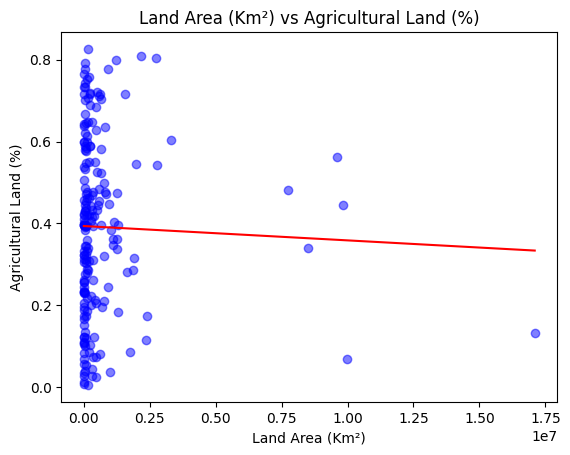

In [71]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.title('Land Area (Km²) vs Agricultural Land (%)')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Agricultural Land (%)')
plt.scatter(data['Land Area(Km2)'], data['Agricultural Land( %)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Land Area(Km2)'], data['Agricultural Land( %)'], 1)
line = slope * np.unique(data['Land Area(Km2)']) + intercept

plt.plot(np.unique(data['Land Area(Km2)']), line, color='red')
plt.show()


</h1> Calculating Pearson correlation coefficient</h1>


In [72]:
corr = pearsonr(data['Land Area(Km2)'], data['Agricultural Land( %)'])
print(corr)

PearsonRResult(statistic=-0.03137208172224709, pvalue=0.663288144780314)


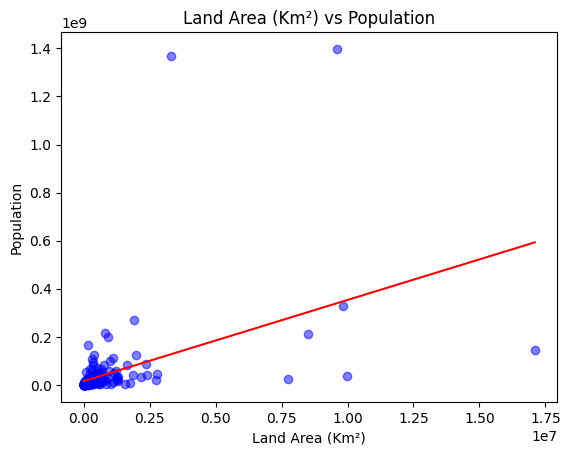

PearsonRResult(statistic=0.44689103965544386, pvalue=5.796625844533042e-11)


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.title('Land Area (Km²) vs Population')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population')

# Plotting the scatter plot with blue color and semi-transparent points
plt.scatter(data['Land Area(Km2)'], data['Population'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Land Area(Km2)'], data['Population'], 1)
line = slope * np.unique(data['Land Area(Km2)']) + intercept

# Adding the line of best fit to the plot in red color
plt.plot(np.unique(data['Land Area(Km2)']), line, color='red')

# Displaying the plot
plt.show()

# Calculating Pearson correlation coefficient
corr = pearsonr(data['Land Area(Km2)'], data['Population'])
print(corr)


KeyError: 'Urban_population'

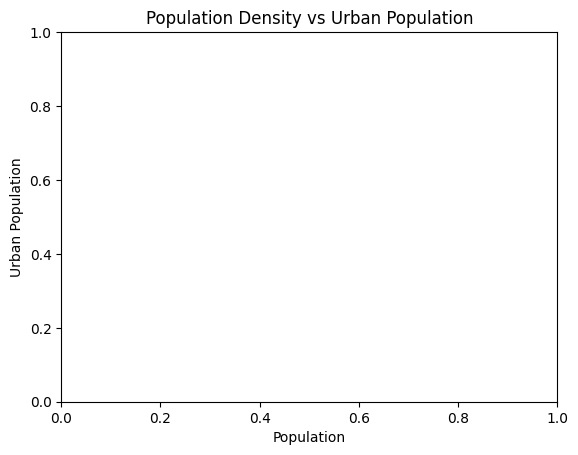

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.title('Land Area (Km²) vs Population')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population')

# Plotting the scatter plot with blue color and semi-transparent points
plt.scatter(data['Land Area(Km2)'], data['Population'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Land Area(Km2)'], data['Population'], 1)
line = slope * np.unique(data['Land Area(Km2)']) + intercept

# Adding the line of best fit to the plot in red color
plt.plot(np.unique(data['Land Area(Km2)']), line, color='red')

# Displaying the plot
plt.show()

# Calculating Pearson correlation coefficient
corr = pearsonr(data['Land Area(Km2)'], data['Population'])
print(corr)


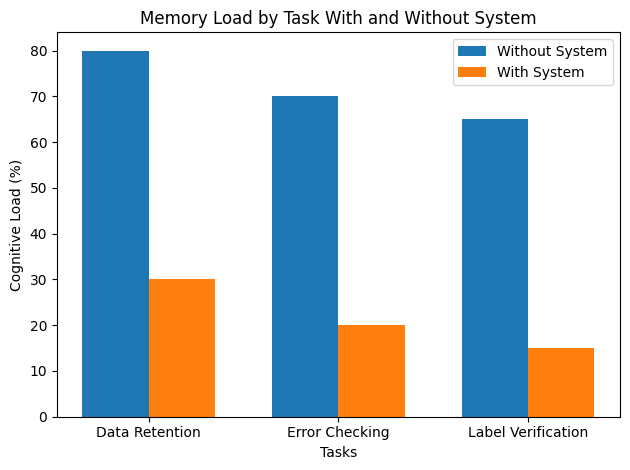